# <center>Does Curricular Complexity Imply Program Quality?</center>

<center>
    <b>Gregory L. Heileman$^\dagger$, William G. Thompson-Arjona$^\dagger$, Orhan Abar$^\ddagger$ and Hayden W. Free$^\ddagger$</b> <br>
    $^\dagger$Department of Electrical & Computer Engineering <br>
    $^\ddagger$Department of Computer Science <br>
    University of Kentucky <br>
    {greg.heileman, wgthompson, orhan.abar,  hayden.free}@uky.edu
</center>

## Introduction
In this notebook we compare the complexity of electrical engineering programs across the U.S. News & World report rankings, revealing a surprising finding, namely that higher ranked programs tend to have less complex curricula.  Because the curricular complexity metrics used here directly relate to a student's ability to complete that curriculum, this means that from a structural perspective (i.e., the manner in which curricula are structured), it is generally easier for students to complete the electrical engineering curricula at higher ranked schools.  

This analysis is based upon recently developed curricular complexity metrics (see <cite data-cite="he:18">Heileman, et. al, (2018)</cite>).  Research in this area demonstrates that according to these complexity metrics, engineering programs tend to be among the most complex univeristy curricula. This is attributed to the large number of prerequisites that accompany many of the courses in engineering programs, as well as the long prerequisite chains that tend to exist in these curricula. This notebook makes use use of a Curricular Analytics toolbox that was built to compute these curricular complexity metrics <cite data-cite="he:18">Heileman, et. al. (2019)</cite>).    

The following commands will install the Curricular Analytics toolbox, as well as a number of other Julia programming language packages that are used within the notebook: 

In [1]:
using CurricularAnalytics
using Glob
using CSV
using DataFrames
using Statistics
using StatsPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17037830371933146367\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10433616935610531693\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17037830371933146367\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Complexity of Electrical Engineering Curricula
To get a sense of the diversity in the complexities of electrical enginering program curricula, below we provide  visulizations of two programs, one with low curricular complexity and another with high curricular complexity. Consider first a degree plan associated with an electrical engineering program having relatively low curricular complexity.

In [2]:
visualize(read_csv("./tier_top/Carnegie Mellon University.csv"), notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Curriculum\",\"dp_name\":\"Carnegie Mellon University.csv\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":8.0,\"blocking factor\":5,\"delay factor\":3.0},\"nameSub\":\"18-100\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":7.0,\"blocking factor\":3,\"delay factor\":4.0},\"nameSub\":\"15-112\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":13.0,\"blocking factor\":8,\"delay factor\":5.0},\"nameSub\":\"21-120\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"76-101\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"99-101\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":5,\"complexity\":8.0,\"blocking factor\":3,\"delay factor\":5.0},\"nameSub\":\"33-141\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":7,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":13,\"complexity\":9.0,\"blocking factor\":5,\"delay factor\":4.0},\"nameSub\":\"21-122\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Introductory Engineering course\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"General Education course\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":10,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"18-200\",\"id\":10,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":11,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":10,\"complexity\":7.0,\"blocking factor\":3,\"delay factor\":4.0},\"nameSub\":\"18-202\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":12,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":5,\"complexity\":7.0,\"blocking factor\":2,\"delay factor\":5.0},\"nameSub\":\"33-142\",\"id\":12,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":5.0,\"blocking factor\":2,\"delay factor\":3.0},\"nameSub\":\"39-210\",\"id\":13,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":14,\"type\":\"coreq\"},{\"source_id\":12,\"target_id\":14,\"type\":\"coreq\"},{\"source_id\":1,\"target_id\":14,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":13,\"complexity\":6.0,\"blocking factor\":1,\"delay factor\":5.0},\"nameSub\":\"18-220\",\"id\":14,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complex

By hovering your mouse over the courses in this degree plan, you can view the contribution that various course make to the overall compleixty of this curriculum.

Next consider the degree plan for an electrical engineering program that has a much larger curricular complexity.


In [3]:
visualize(read_csv("./tier_bottom/University of Missouri--Kansas City.csv"), notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Curriculum\",\"dp_name\":\"University of Missouri--Kansas City.csv\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ANCH 150\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"CHEM 211\",\"id\":2,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"DISC 100\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ECE 130\",\"id\":4,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":37.0,\"blocking factor\":27,\"delay factor\":10.0},\"nameSub\":\"MATH 210\",\"id\":5,\"credits\":4,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":6,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":236,\"complexity\":34.0,\"blocking factor\":24,\"delay factor\":10.0},\"nameSub\":\"MATH 220\",\"id\":6,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":7,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":99,\"complexity\":26.0,\"blocking factor\":18,\"delay factor\":8.0},\"nameSub\":\"PHYS 240\",\"id\":7,\"credits\":5,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ANCH 200\",\"id\":8,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"DISC 200\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":10,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":3,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"ECE 216\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":16.0,\"blocking factor\":10,\"delay factor\":6.0},\"nameSub\":\"ECE 226\",\"id\":11,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":12,\"type\":\"coreq\"}],\"name\":\" \",\"metrics\":{\"centrality\":29,\"complexity\":14.0,\"blocking factor\":8,\"delay factor\":6.0},\"nameSub\":\"ECE 227\",\"id\":12,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":6,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":134,\"complexity\":31.0,\"blocking factor\":21,\"delay factor\":10.0},\"nameSub\":\"ECE 241\",\"id\":13,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":7,\"target_id\":14,\"type\":\"prereq\"},{\"source_id\":6,\"target_id\":14,\"type\":\"prereq\"}],\"name\":\" \",\"metrics\":{\"centrality\":192,\"complexity\":24.0,\"blocking factor\":16,\"delay factor\":8.0},\"nameSub\":\"PHYS 250\",\"id\":14,\"credits\":5,\"nameCanonical\":\"\"}],\"id\":3},{\"name\":\"Term 4\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":11,\"target_id\":15,\"type\":\"pr

Notice that the overall curricular complexity of the second degree plan is more than three times that of the first; however, the U.S. News & World Report ranking of the first school is much higher than that of the second.  The question we answer here is whether or not that relationship holds in general.

## Methology
The most well-known rankings in higher education are conducted by the U.S. News & World Report. In this study we used the rankings provided by the U.S. News & World Report 2018 Best Undergraduate Engineering Programs survey as a proxy for program quality \cite{BaBo:10,By:18}.  That is, for the purpose of this study, we assume that the "best" engineering programs are synonymous with the highest quality engineering programs.  We acknowledge the concerns that are routinely expressed concerning these rankings \cite{}.  However, it should be noted that this study uses aggregations of schools with tiers, and the statistics associated with the aggregations.  Thus, the specific rankings of the schools within the tiers are irrelevant, all that matters is the tier in which a school is placed. Upon inspection of the schools within each tier, we believe that knowledgable and impartial observes would agree that the three tiers constructed in this study are highly correlated with the program quality.

To appear on a U.S. News & World Report undergraduate engineering survey, a school must have at least one undergraduate engineering program that is accredited by ABET. Two surveys are conducted, one for schools whose highest engineering degree offered is a doctorate and another for schools whose highest engineering degree offered is a bachelor's or master's. For this study we consider the ranking provided by the former; that is, the ranking of doctoral institutions. This ranking is based solely on the peer assessment provided by deans and senior faculty members at doctoral institutions, and involves asking these survey participants to rate each program they are familiar with on a scale from 1 (marginal) to 5 (distinguished). Two peer assessment surveys are sent to each ABET-accredited engineering program at these schools, with a response rate of approximately 58%.  U.S. News & World Report uses the two most recent years' responses to calculate weighted average scores of programs, which determines the ranking. The U.S. News & World Report 2018 Best Undergraduate Engineering Programs rankings for doctoral institutions lists 205 schools, with a formal ranking designation given to the programs in the 1-177 range. Programs ranked lower than 177 are listed alphabetically and lumped into a ranking category. 

## Experimental Design
The question of interest in this study is whether or not curricular complexity is related to program quality. In order to answer this question, we constructed an analysis of variance (ANOVA) experiment that involved partitioning the schools in the U.S. News & World Report 2018 Best Undergraduate Engineering Programs rankings according to their decile within the ranking. From these three groups were created as follows. A *top tier* of schools defined as those in the first decile of the ranking.  A *mid tier*, defined as the set of schools in the fifth and sixth deciles of the ranking that are equidistant from first to last ranked schools. Due to the large number of ties that occur in the middle of the ranking, this resulted in selecting only those schools tied for 82-nd and 99-nth in the ranking, for a total of 26 schools. A *bottom tier* of schools comprised of the schools ranked below 177, which spans approximately three deciles. The null hypothesis is:

    "There is no difference between the mean values of the curricular complexities of those schools belonging 
     to the top, mid and bottom tiers." 

The alternative hypothesis is then: 

    "At least one of the curricular complexity mean values of a school tier differs significantly from the 
     means of the other two tiers."
     
Histograms showing the curricular complexity distributions for the random samples drawn from each of the three tiers are shown below.

In [4]:
tier_top_files = glob("*", "tier_top")
tier_middle_files = glob("*", "tier_middle")
tier_bottom_files = glob("*", "tier_bottom")
files = vcat(tier_top_files, tier_middle_files, tier_bottom_files)

curriculum = Dict{String, Curriculum}()
for csv_filepath in files
    dp = read_csv(csv_filepath)
    complexity(dp.curriculum)
    curriculum[csv_filepath] = dp.curriculum
end

Virginia Polytechnic Institute and State University => 398.0
University of California--Los Angeles => 231.69999999999985
Columbia University => 246.0
California Institute of Technology => 84.30000000000008
Northwestern University => 208.0
Princeton University => 77.0
Duke University => 133.0
Johns Hopkins University => 180.0
Purdue University => 237.0
University of California--San Diego => 175.69999999999987
University of California--Berkeley => 57.300000000000054
University of Michigan--Ann Arbor => 170.0
University of Illinois--Urbana-Champaign => 180.0
Stanford University => 88.80000000000004
Cornell University => 118.0
Rice University => 149.0
Carnegie Mellon University => 139.0
University of Texas--Austin => 171.0
Texas AM University--College Station => 365.0
University of Wisconsin => 278.0
Georgia Institute of Technology => 275.0
Avg. curricular complexity = 188.66


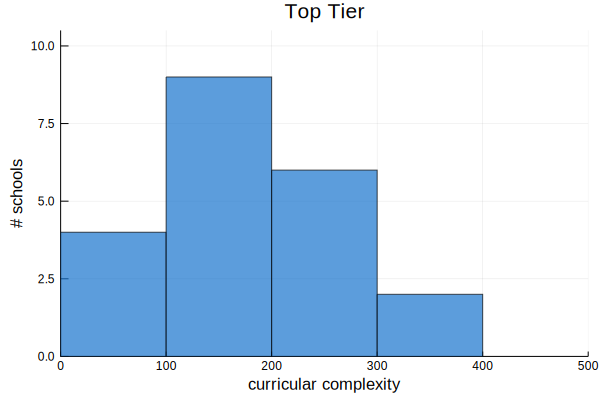

In [5]:
top_tier = Array{Curriculum,1}()
top_tier_total_cc = 0
top_tier_avg_cc = 0
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_top"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(top_tier, val)
        top_tier_total_cc += val.metrics["complexity"][1]
    end
end
top_tier_avg_cc = round(top_tier_total_cc / length(top_tier), digits=2)
println("Avg. curricular complexity = $(top_tier_avg_cc)")
metric_histogram(top_tier, "complexity", nbins=5, title="Top Tier", xlabel="curricular complexity", ylabel="# schools", xlim=(0,500))

University of Miami => 200.0
Embry-Riddle Aeronautical University => 336.0
University of Oklahoma => 242.0
New Jersey Institute of Technology => 402.0
University of North Carolina--Charlotte => 433.0
Southern Methodist University => 292.0
San Diego State University => 286.0
University of Kentucky => 236.0
Indiana University-Purdue University--Indianapolis => 262.0
University of Houston => 500.0
University of California--Riverside => 280.9999999999999
Louisiana State University--Baton Rouge => 270.0
Brigham Young University => 283.0
George Washington University => 306.0
Texas Tech University => 300.0
University of Cincinnati => 172.0
Oklahoma State University => 308.0
University of California--Santa Cruz => 183.59999999999997
Clarkson University => 213.0
University of Missouri => 207.0
University of Alabama => 291.0
Avg. curricular complexity = 285.8857142857143


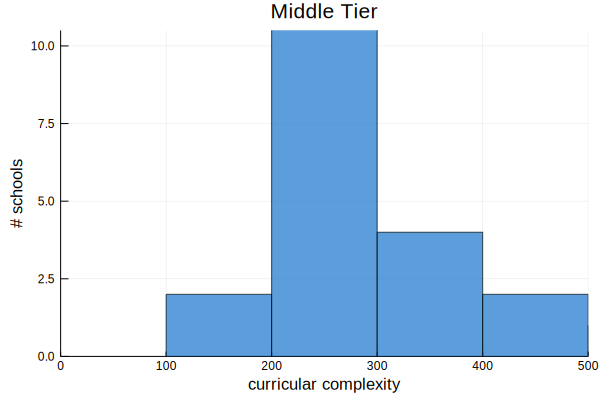

In [6]:
middle_tier = Array{Curriculum,1}()
middle_tier_total_cc = 0
middle_tier_avg_cc = 0
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_middle"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(middle_tier, val)
        middle_tier_total_cc += val.metrics["complexity"][1]
    end
end
middle_tier_avg_cc = middle_tier_total_cc / length(middle_tier)
println("Avg. curricular complexity = $(middle_tier_avg_cc)")
metric_histogram(middle_tier, "complexity", nbins=5, title="Middle Tier", xlabel="curricular complexity", ylabel="# schools", xlim=(0,500))

Florida Atlantic University => 294.0
Oakland University => 232.0
University of Louisiana--Lafayette => 323.0
South Dakota State University => 386.0
Texas State University => 266.0
University of Bridgeport => 167.0
Jackson State University => 298.0
University of Denver => 353.0
University of North Texas => 363.0
Texas AM University--Kingsville => 344.0
Morgan State University => 303.0
University of New Orleans => 256.0
Prairie View AM University => 367.0
University of Detroit Mercy => 392.0
University of North Dakota => 354.0
Lamar University => 327.0
University of Missouri--Kansas City => 485.0
Western Michigan University => 300.0
Tuskegee University => 384.0
University of Tennessee--Chattanooga => 394.0
Tennessee State University => 489.0
Avg. curricular complexity = 337.0


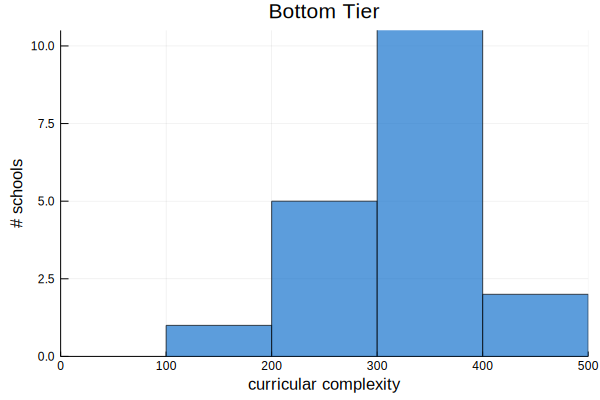

In [7]:
bottom_tier = Array{Curriculum,1}()
bottom_tier_total_cc = 0
bottom_tier_avg_cc = 0
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_bottom"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(bottom_tier, val)
        bottom_tier_total_cc += val.metrics["complexity"][1]
    end
end
bottom_tier_avg_cc = bottom_tier_total_cc / length(bottom_tier)
println("Avg. curricular complexity = $(bottom_tier_avg_cc)")
metric_histogram(bottom_tier, "complexity", nbins=5, title="Bottom Tier", xlabel="curricular complexity", ylabel="# schools", xlim=(0,500))

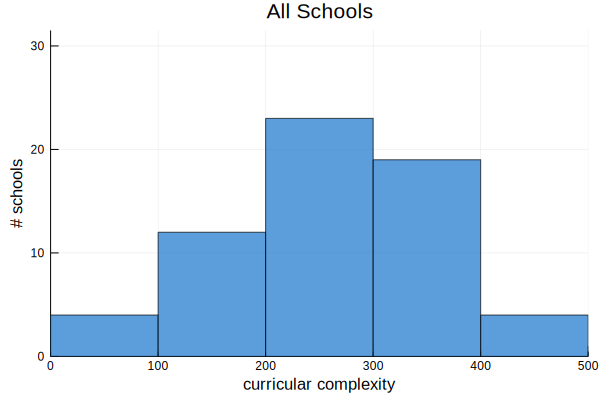

In [8]:
metric_histogram([top_tier; middle_tier; bottom_tier], "complexity", nbins=5, title="All Schools", xlabel="curricular complexity", ylabel="# schools", xlim=(0,500))

A box-and-whisker diagram for each of the three samples, provided below, shows the differences between the various statistics associated with these samples.  The quesion we will answer using ANOVA anlaysis is whether or not these variances are statistically significant across these three tiers.

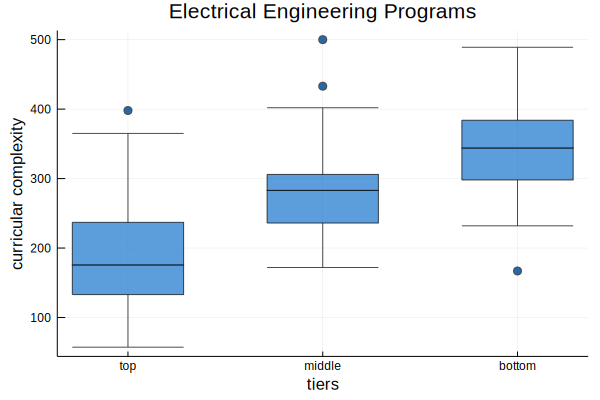

In [9]:
metric_boxplot(["top" "middle" "bottom"], [top_tier, middle_tier, bottom_tier], "complexity", 
    title="Electrical Engineering Programs", xlabel="tiers", ylabel="curricular complexity")

## ANOVA Analysis

The ANOVA analysis involves random sampling of schools within each of the three tiers. In order to ensure the analysis is able to distinguish between actual curricular complexity differences among the tiers, and random variation, sufficient sample sizes must be determined. Under the assumption that the curricular complexity distributions within the tiers are approximately normal, with variance $\sigma^2$, the number of samples that should be selected from each tier is given by
\begin{equation}
 n = \left({\sigma Z \over E}\right)^2,
\end{equation}
where $Z$ is the confidence interval expressed using deviation within the standard normal distribution, and $E$ is the margin of error. To obtain an estimate of $\sigma$, pilot samples from each of the three tiers were taken, yielding the estimate $\hat{\sigma} = 90$. For a 95\% confidence interval, which corresponds to $Z = 1.96$, the margin of error will be 40 curricular complexity points, i.e., 20 points on either side of the mean for a tier. Using these values in the equation provided above leads to sample sizes of $n_1 = n_2 = n_3 = 20$, where $n_1, n_2$ and $n_3$ are the sample sizes for the top, medium and bottom tiers, respectively. Thus, by sampling at least 20 schools from each tier, we can have 95\% confidence that the error in this analysis will be by no more than 40 curricular complexity points.

In order to test the null hypothesis using ANOVA, we must assume the curricular complexity values of the schools within each tier are normally distributed, and that all three tiers have the same variance $\sigma^2$. It should be noted that these conditions can be moderately relaxed (particularly the normality assumption) and the analysis will remain valid \cite{MeScWa:81}. 

The ANOVA method partitions the total sum of squares of the deviations in curricular complexity across all schools into two independent parts, one that is attributed to the independent variable (program quality in this case), and a remainder that is attributed to random errors arising from other factors not accounted for in this experiment. That is,
\begin{equation}
 TSS = SST + SSE,
\end{equation}
where $TSS$ denotes the total sum of squares of deviations, $SST$ represents the sum of squares of the deviations between the tiers, and SSE is the sum of squares attributed to errors or noise. More specifically, if we let $cc_{ij}$ denote the curricular complexity of the $j$\nth school sampled from the $i$-th tier, then
\begin{equation}
 TSS = \sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \overline{cc}\right)^2,
\end{equation}
where $\overline{cc}$ is the sample mean for all samples drawn over all tiers.  The sum of squares deviation between the tiers is given by 
\begin{equation}
 SST = \sum_{i=1}^3 n_i\left(\overline{T}_i - \overline{cc}\right)^2,
\end{equation}
where $T_i$ is the total curricular complexity of the schools sampled from the $i$-th tier, and $\overline{T}_i = T_i/n_i, i = 1,2,3$, are the tier sample averages.
Note that when the sample means for the three tiers are the same, $SST=0$.

Substituting the TSS and SST equations provided above into $TSS = SST + SSE$, and solving for $SSE$ yields:
\begin{equation}
 SSE = {\sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \bar{T}_i\right)^2}.
\end{equation}

The unbiased estimator of $\sigma^2$ based on $n - 3$ degrees of freedom is given by the mean square error,
\begin{equation}
 MSE = {SSE \over n - 3},
\end{equation}
where $n = n_1 + n_2 + n_3$.

The mean square for the tiers has 2 degrees of freedom, i.e., one less than the number of tiers, and is therefore
\begin{equation}
 MST = {SST \over 2}. 
\end{equation}

In order to assess the statistical significance of a decision to reject the null hypothesis, an $F$-test is conducted to compare the deviation among the tier variances.  The $F$-test statistic is given by
\[
 F = {MST \over MSE}.
\] 
Note that the $F$-test is a ratio that compares the mean square variability between the tiers to the mean square variability within the tiers. Thus, as $F$-test values increase above $1$, the data are increasingly inconsistent with the null hypothesis, and the null hypothesis should be rejected when $F > F_{\alpha}$,
where $F_{\alpha}$ is the critical value of $F$ where the probability of a type I error is $\alpha$.

For the $F$ distribution with $(2, 65)$ degrees of freedom, $F_{0.05} = 3.15$.  That is, if the $F$-test for the experiment yields a value greater than $3.15$, we can reject the null hypothesis with only a 5\% chance of doing so in error.

Let $n_1, n_2$ and $n_3$ be the sample sizes drawn from top, medium and low tier schools, respectively, with $n = n_1 + n_2 + n_3$.

In [10]:
n_1 = length(tier1)
n_2 = length(tier2)
n_3 = length(tier3)

n = n_1 + n_2 +n_3;

UndefVarError: UndefVarError: tier1 not defined

Compute the TSS:

\begin{equation}
 TSS = \sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \overline{cc}\right)^2
\end{equation}



In [11]:
cc_bar = (top_tier_total_cc + middle_tier_total_cc + bottom_tier_total_cc) / n 
TSS = 0.0
for curric in values(top_tier)
    cc_ij = curric.metrics["complexity"][1]
    TSS += (cc_ij - cc_bar)^2
end
for curric in values(middle_tier)
    cc_ij = curric.metrics["complexity"][1]
    TSS += (cc_ij - cc_bar)^2
end
for curric in values(bottom_tier)
    cc_ij = curric.metrics["complexity"][1]
    TSS += (cc_ij - cc_bar)^2
end
TSS = round(TSS, digits=2)

UndefVarError: UndefVarError: n not defined

Compute the SST:

\begin{equation}
 SST = \sum_{i=1}^3 n_i\left(\overline{T}_i - \overline{cc}\right)^2
\end{equation}

In [12]:
SST = round(n_1 * (top_tier_avg_cc - cc_bar)^2 + 
            n_2 * (middle_tier_avg_cc - cc_bar)^2 + 
            n_3 * (bottom_tier_avg_cc - cc_bar)^2, digits=2)

UndefVarError: UndefVarError: cc_bar not defined

Compute the SSE: 
\begin{equation}
 SSE = {\sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \bar{T}_i\right)^2}
\end{equation}

In [13]:
SSE = 0.0
for curric in values(top_tier)
    cc_ij = curric.metrics["complexity"][1]
    SSE += (cc_ij - top_tier_avg_cc)^2
end
for curric in values(middle_tier)
    cc_ij = curric.metrics["complexity"][1]
    SSE += (cc_ij - middle_tier_avg_cc)^2
end
for curric in values(bottom_tier)
    cc_ij = curric.metrics["complexity"][1]
    SSE += (cc_ij - bottom_tier_avg_cc)^2
end
SSE = round(SSE, digits=2)
println(SST)
println(SSE)
println(SST+SSE)

UndefVarError: UndefVarError: SST not defined

\begin{equation}
 MSE = {SSE \over n - 3}
\end{equation}

In [14]:
MSE = round(SSE/(n-3), digits=2)

UndefVarError: UndefVarError: n not defined

\begin{equation}
 MST = {SST \over 2}
\end{equation}

In [15]:
MST = round(SST/2, digits=2)

UndefVarError: UndefVarError: SST not defined

The $F$-test statistic is given by
\begin{equation}
F = {MST \over MSE}
\end{equation}

In [16]:
F = round(MST/MSE, digits=2)

UndefVarError: UndefVarError: MST not defined

The results of the ANOVA analysis associated with the samples selected from the three tiers of schools are shown below. 

In [17]:
println("\t   SS\t\tdf\t\t  MS\t\t F")
println("\t-----------------------------------------------------")
println("Tiers  | $SST\t2\t\t$MST\t$F")
println("Error  | $SSE\t$(n-3)\t\t$MSE")
println("Totals | $(SST+SSE)\t$(n-1)")

	   SS		df		  MS		 F
	-----------------------------------------------------


UndefVarError: UndefVarError: SST not defined

Notice that the $F$-test statistic obtained from this analysis is $17.45$.  Because
\begin{equation}
  17.45 > F_{0.05} = 3.15,
\end{equation}
the null hypothesis should be rejected.  That is, with a low probability of error, the samples collected from each tier indicate that the mean curricular complexity values of the tiers are different.  This result, along with the evidence given in histograms and box-and-whisker diagram, provide strong evidence that higher quality undergraduate computer science programs have lower curricular complexity, and that lower quality undergraduate computer science programs have higher curricular complexity. 

### Notched Box Plot
In a notched box plot the notches represent confidence intervals. Specifically, the notch provides an interval about  the median $m$ computed using:
$$
 m \pm 1.57 \times IQR/\sqrt{n_i}
$$
where $IQR$ is the interquartile range (the distance between the 25th and 75 percentile), and $n_i$ is number of observations in the $i$th sample.  Informally, if the notches of two boxes do not overlap on the $y$ axis, there is strong evidence (i.e., 95% confidence) their medians differ.

In [ ]:
series_top = Array{Real,1}();  series_middle = Array{Real,1}();  series_bottom = Array{Real,1}()
for curric in top_tier
    push!(series_top, curric.metrics["complexity"][1])
end
for curric in middle_tier
    push!(series_middle, curric.metrics["complexity"][1])
end
for curric in bottom_tier
    push!(series_bottom, curric.metrics["complexity"][1])
end
boxplot(["top" "middle" "bottom"], [series_top, series_middle, series_bottom], notch=true, title="Electrical Engineering Programs", 
    xlabel="tiers", ylabel="curricular complexity", legend=false, alpha=0.7, color=:dodgerblue3)

## Conclusions

We have demonstrated that an inverse relationship exists between the complexity of the curricula in undergraduate electrical engineering programs and the perceived quality of these programs. Specifically, at doctoral-granting engineering schools the complexity of the electrical engineering undergraduate curricula at the highest quality schools (where quality is subjectively determined by a survey proved to all schools in this category) is drastically less than the complexity of the curricula at those schools judged to be at the lower end of this quality ranking. The average complexity of those schools at the bottom of the raking is almost twice the average of those schools in the top decile of the ranking. In addition, we demonstrated that this difference is statistically significant; that is, this difference is due to something other than chance. Because the complexity of a curriculum is a measure of the difficulty that students are expected to have completing that curriculum, this difference has important student success implications. In particular, if we were to equalize instructional factors (e.g., the difficulty of the courses in the curriculum, the support services provided to students, etc.) and student background preparation, we would expect students to graduate at a higher rate from the lower complexity curricula. This is indeed what we observe, and the fact that this benefit is most pronounced in the highest quality programs deserves further investigation. It is possible to produce arguments for both sides of a possible cause-and-effect relationship between curricular complexity and program quality.  Below we consider a few.

One might argue that because the top tier schools admit better prepared students they can offer less complex curricula, as their students can more easily overcome any knowledge gaps that may exist due to having fewer prerequisites prior to attempting a given course, as well as fewer total courses in their curricula. It should be noted, however, that there are a number of schools outside the tier that have created pathways in the first year of their curricula that substantially reduce curricular complexity. These curricular innovations have been demonstrated to significantly improve graduation rates, as well as the attainment of program learning outcomes. That is, it is possible to reduce the complexity of engineering programs that serve less-prepared students, while actually improving program quality (as judged by outcomes). More generally, we note that the principle of Occam's razor is often applied to guide engineering designs towards the simplest and therefore best solutions.  One of the most popular versions of this principle states, ``Entities are not to be multiplied without necessity.''  We posit that this study indicates this principle applies to curricula.  Namely, the simplest curriculum (in terms of complexity) that allows students to attain a program's learning outcomes yields the best student success outcomes and therefore the highest quality program.

## References
Accreditation Board for Engineering and Technology (ABET) (2017). Criteria for Accrediting Engineering Programs: Effective for Reviews During the 2017–2018 Accreditation Cycle. www.abet.org.

Cornell University, Electrical and Computer Engineering, Program Requirements, (accessed August 10, 2018). www.ece.cornell.edu/ece/programs/undergraduate-programs/majors/program-requirements.

Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.